In [3]:
import math
import operator
import random
from pathlib import Path
from time import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd  # reading all required header files
from scipy.stats import multivariate_normal
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris, make_blobs
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
from tqdm.notebook import tqdm

In [4]:
iris_sizes = [150, 1500, 15_000, 150_000, 1_500_000, 15_000_000]

In [43]:
sklearn_times = []
for s in tqdm(iris_sizes):
    df = pd.read_csv(
        f"data/BDA/Dataset 1/Iris-{s}.txt",
        header=None,
        names=["c1", "c2", "c3", "c4", "label"],
    )
    # print(df.head())
    df = df.drop("label", axis=1)
    X = df.to_numpy()
    t = time()
    model = KMeans(
        n_clusters=50,
        n_init=10,
        max_iter=100,
        tol=0.001,
        init="random",
    ).fit(X)
    t = time() - t
    sklearn_times.append(t)

  0%|          | 0/6 [00:00<?, ?it/s]

In [12]:
sklearn_times

[0.05382132530212402,
 0.00815439224243164,
 0.02653980255126953,
 0.13724350929260254,
 1.0898935794830322,
 9.750072956085205]

In [17]:
1e-3

1.0

In [21]:
npar_times = [307 * 1e-6, 2.9 * 1e-3, 29 * 1e-3, 317 * 1e-3, 3.04, 35.7]
par_times = [4 * 1e-3, 10 * 1e-3, 24 * 1e-3, 108 * 1e-3, 943 * 1e-3, 9.1]

In [47]:
par_times

[0.004, 0.01, 0.024, 0.108, 0.9430000000000001, 9.1]

In [46]:
npar_times

[0.000307, 0.0029, 0.029, 0.317, 3.04, 35.7]

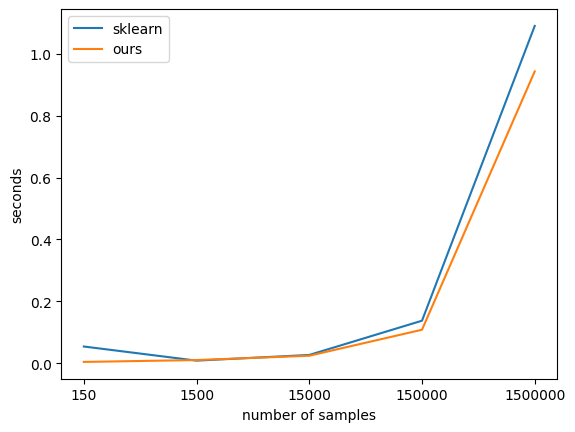

In [40]:
dplt.plot(sklearn_times[:-1], label="sklearn")
plt.plot(par_times[:-1], label="ours")
plt.legend()
plt.ylabel("seconds")
plt.xlabel("number of samples")
plt.xticks(ticks=range(len(iris_sizes[:-1])), labels=iris_sizes[:-1])
# plt.xscale("log")
plt.show()

In [9]:
df = pd.read_csv(
    f"data/BDA/Dataset 2/Dataset2.csv",
    header=None,
    names=[f"c{i}" for i in range(13)],
)
# print(df.head())

In [8]:
X = df.to_numpy()
model = KMeans(
    n_clusters=3,
).fit(X)

/home/zademn/.conda/envs/pytorch-310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


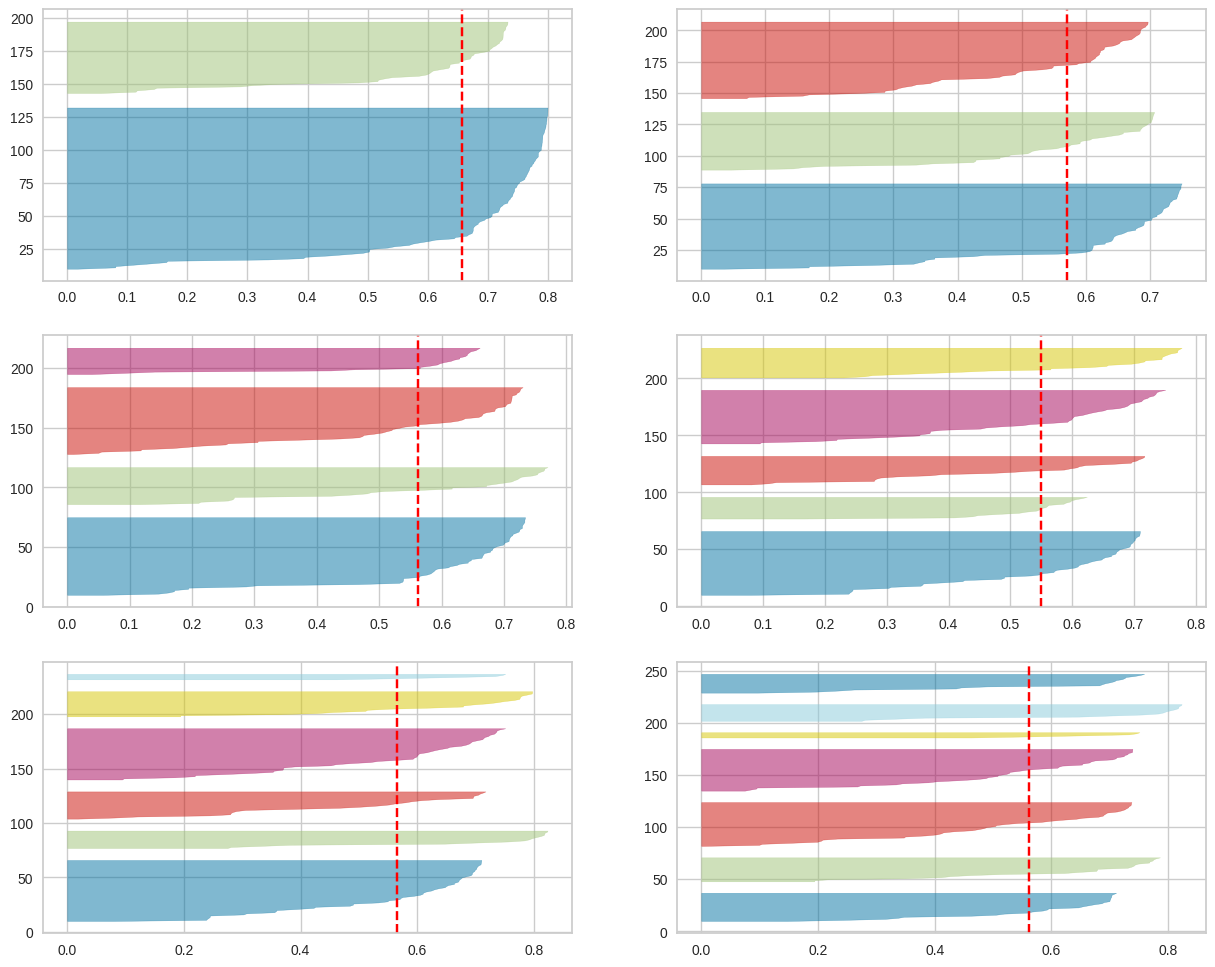

In [19]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(3, 2, figsize=(15, 12))
for i in [2, 3, 4, 5, 6, 7]:
    """
    Create KMeans instance for different number of clusters
    """
    km = KMeans(
        n_clusters=i, init="k-means++", n_init=10, max_iter=100, random_state=42
    )
    q, mod = divmod(i, 2)
    """
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    """
    visualizer = SilhouetteVisualizer(
        km, colors="yellowbrick", ax=ax[q - 1][mod]
    )
    visualizer.fit(X)

In [11]:
labels = [
    2,
    2,
    2,
    2,
    2,
    2,
    1,
    2,
    2,
    0,
    1,
    0,
    1,
    0,
    0,
    1,
    0,
    0,
    1,
    1,
    1,
    0,
    0,
    2,
    1,
    0,
    0,
    0,
    1,
    0,
    0,
    1,
    1,
    0,
    0,
    0,
    0,
    0,
    1,
    1,
    0,
    0,
    0,
    0,
    0,
    1,
    1,
    0,
    1,
    0,
    1,
    0,
    0,
    0,
    1,
    0,
    0,
    0,
    0,
    1,
    0,
    0,
    1,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    1,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    1,
    0,
    0,
    0,
    1,
    1,
    1,
    0,
    0,
    0,
    0,
    1,
    0,
    0,
    1,
    1,
    0,
    1,
    1,
    0,
    0,
    0,
    0,
    1,
    1,
    1,
    0,
    1,
    1,
    1,
    0,
    1,
    0,
    1,
    1,
    0,
    1,
    1,
    1,
    1,
    0,
    0,
    1,
    1,
    1,
    1,
    1,
    0,
    2,
    2,
    2,
    2,
    1,
    2,
    2,
    2,
    2,
    2,
    2,
    2,
    2,
    2,
    2,
    2,
    2,
    2,
    2,
    1,
    1,
    1,
    2,
    2,
    1,
    1,
    2,
    2,
    1,
    2,
    2,
    2,
    2,
    2,
    2,
    1,
    1,
    2,
    2,
    1,
    1,
    2,
    2,
    1,
    1,
    2,
    2,
    2,
    2,
    2,
]

/home/zademn/.conda/envs/pytorch-310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


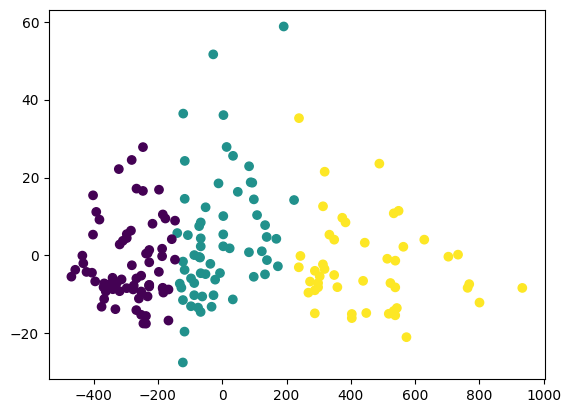

In [12]:
emb = PCA(n_components=2).fit_transform(X)

X = df.to_numpy()
model = KMeans(
    n_clusters=3,
).fit(X)
plt.scatter(*emb.T, c=labels, cmap="viridis")